# AR1 Validation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="talk")    

df=pd.read_csv('data/mu_time_by_region.csv')
df_og=pd.read_csv('data/wide_weekly_scaledPer10k.csv')

## Load the AR1 model parameters

In [35]:
# Per region and time
df_mu       = pd.read_csv('data/ar1/mu.csv')
# Per region
df_alpha    = pd.read_csv('data/ar1/alpha.csv')
df_beta     = pd.read_csv('data/ar1/beta.csv')
df_gamma    = pd.read_csv('data/ar1/gamma.csv')
# Global
df_phi      = pd.read_csv('data/ar1/phi.csv')
df_tau      = pd.read_csv('data/ar1/tau.csv')

## Preprocess
Transform the og df into regions (cols) x time (weeks) 

In [36]:
df_mu.drop(columns=['time'], inplace=True)
df_og=df_og.T
df_og.columns=df_og.iloc[0]
df_og=df_og.drop(df_og.index[0])
df_og=df_og.reset_index(drop=True)

## Make the AR1 model estimate df
Formula
y[i,t] ~ dnorm(mu[i,t] + (phi * (y[i,t-1] - mu[i,t-1])), tau[i])

In [91]:
# Make the t-1 df
df_mu_t1 = df_mu.iloc[:df_mu.shape[0]-1]
df_og_t1 = df_og.iloc[:df_mu.shape[0]-1]
# Extract phi int
phi = df_phi['Mean'].tolist()[0]
# Extract first mu
df_mu_first = pd.DataFrame([df_mu.iloc[0]])
# Extract not first mu
df_mu_rest = df_mu.iloc[1:].reset_index(drop=True)
# Calculate AR(1)
df_ar1 = df_mu_rest + (phi * (df_og_t1 - df_mu_t1))
df_ar1 = pd.concat([df_mu_first, df_ar1], ignore_index=True)
df_ar1

,HSE Dublin and Midlands,HSE Dublin and North East,HSE Dublin and South East,HSE Mid West,HSE South West,HSE West and North West
0,4.243708,2.696245,3.349007,7.502808,4.967876,6.111724
1,2.44691,1.589677,1.85259,4.013441,2.796442,3.435915
2,5.818908,3.98971,4.857194,7.284262,6.204818,8.647971
3,5.092359,3.052252,4.014491,5.555419,4.985041,6.122912
4,4.981065,2.565056,3.492303,6.056178,4.996105,7.225496
...,...,...,...,...,...,...
146,2.885896,1.901484,2.863596,7.090843,4.8759,6.439809
147,2.513819,1.709625,2.993674,5.699869,5.171092,5.263354
148,2.544829,1.758125,2.966558,5.264887,4.448962,5.714508
149,2.900188,1.885774,2.914836,5.568461,4.907018,5.295517


## Plot MU
This should look like yearly oscillations

In [103]:
# Get CI bounds for mu
df_mu_lower = pd.read_csv('data/ar1/mu025.csv')
df_mu_upper = pd.read_csv('data/ar1/mu975.csv')
df_mu_lower.drop(columns=['time'], inplace=True)
df_mu_upper.drop(columns=['time'], inplace=True)    

0      6.483782
1      6.560354
2      6.636074
3      6.720904
4      6.803968
         ...   
146    6.258462
147    6.233789
148    6.218732
149    6.214924
150    6.223626
Name: HSE Mid West: Lower Bound, Length: 151, dtype: float64

In [148]:
# Show the residuals for HSE Mid West
pd.concat([df_mu_lower.rename(columns={'HSE Mid West': 'HSE Mid West: Lower CI'})['HSE Mid West: Lower CI'],\
           df_mu_upper.rename(columns={'HSE Mid West': 'HSE Mid West: Upper CI'})['HSE Mid West: Upper CI'].rename({'HSE Mid West': 'Upper Bound'})], axis=1)

,HSE Mid West: Lower CI,HSE Mid West: Upper CI
0,6.483782,8.501319
1,6.560354,8.568056
2,6.636074,8.641760
3,6.720904,8.718002
4,6.803968,8.802569
...,...,...
146,6.258462,8.286375
147,6.233789,8.261360
148,6.218732,8.250100
149,6.214924,8.250398


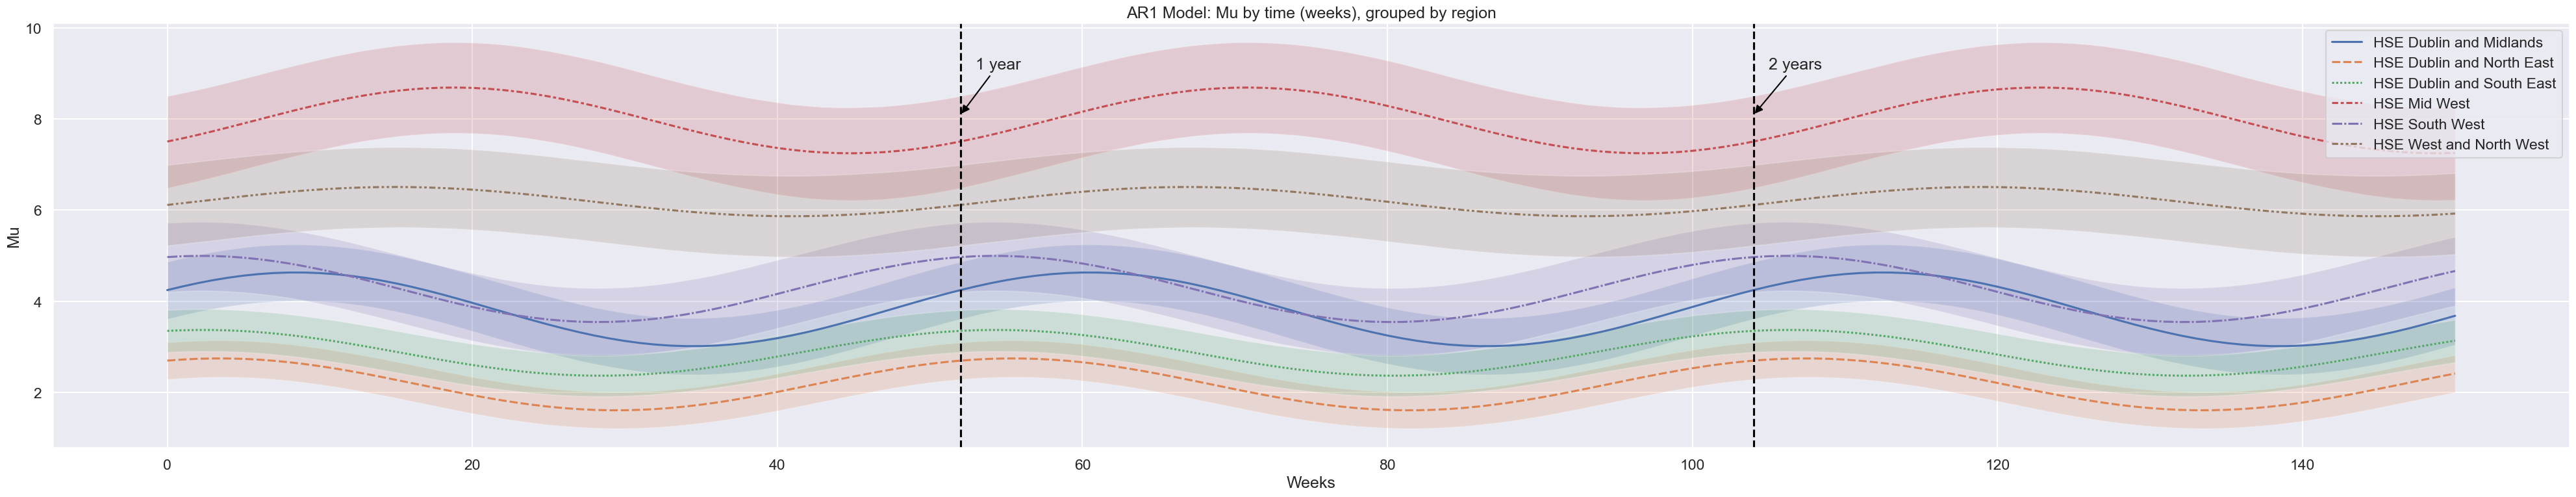

In [ ]:
sns.set_theme(context="talk")    
plt.figure(figsize=(40,8))

# plot data
axs = sns.lineplot(data=df_mu)
# plot ci
for col in df_mu.columns:
    # plt.plot(df_mu.index, df_mu[col], label=col)
    plt.fill_between(df_mu.index, df_mu_lower[col], df_mu_upper[col], alpha=0.2)

axs.axvline(x=104, color='black', linestyle='--')
axs.axvline(x=52, color='black', linestyle='--')

axs.annotate('2 years', xy=(104, plt.ylim()[1]*0.8), xytext=(105, plt.ylim()[1]*.90), arrowprops=dict(arrowstyle='-|>', color='black'))
axs.annotate('1 year',  xy=(52,  plt.ylim()[1]*0.8), xytext=(53, plt.ylim()[1]*.90),  arrowprops=dict(arrowstyle='-|>', color='black'))

axs.set_title('AR1 Model: Mu by time (weeks), grouped by region')
axs.set_xlabel('Weeks')
axs.set_ylabel('Mu')

plt.legend(loc='upper right')
plt.tight_layout()

## Plot AR1 Model

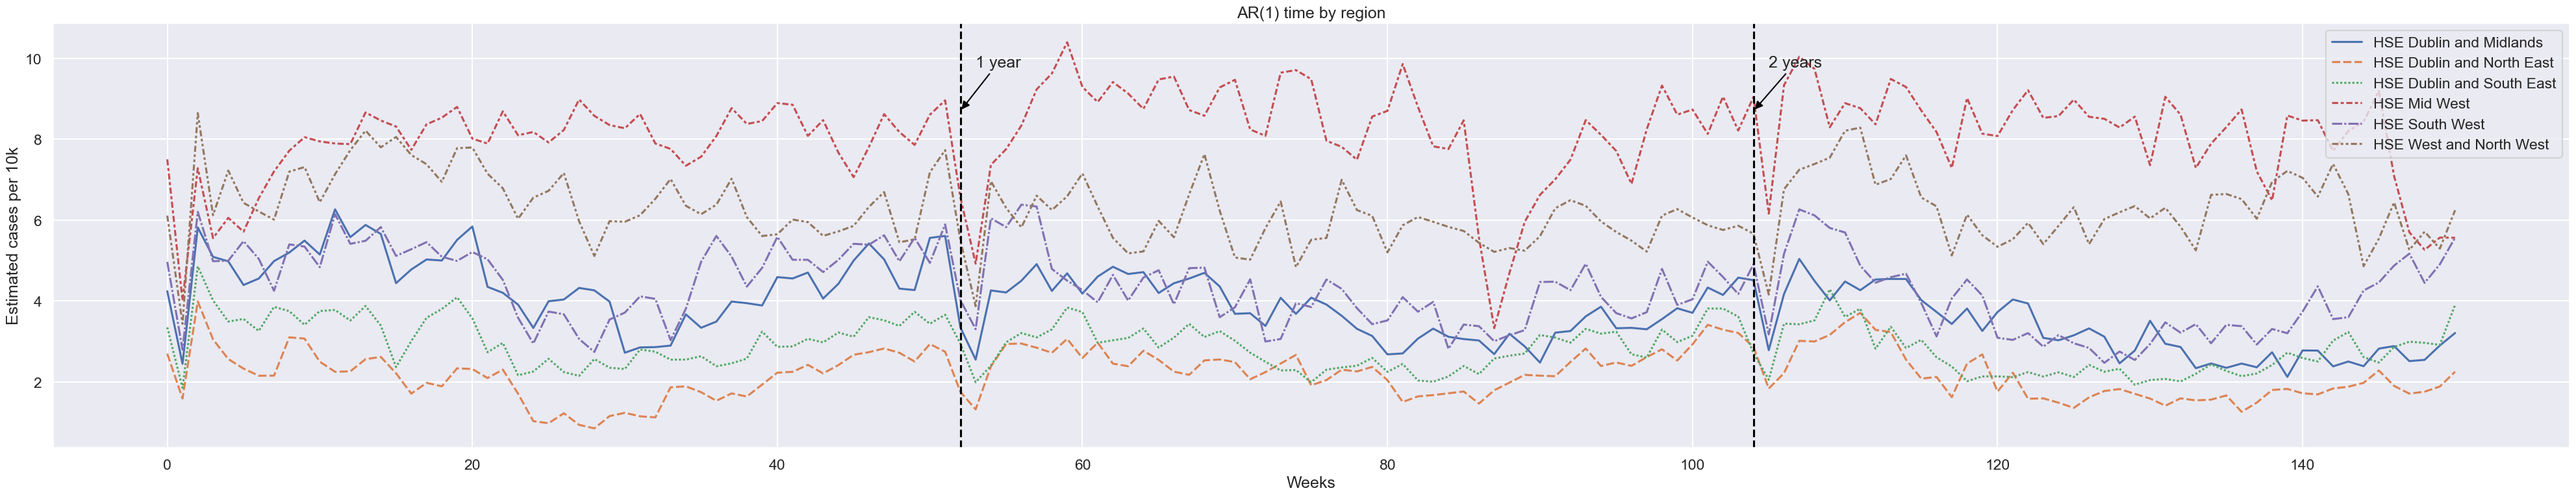

In [ ]:
plt.figure(figsize=(40,8))

axs = sns.lineplot(data=df_ar1)

axs.axvline(x=104, color='black', linestyle='--')
axs.axvline(x=52, color='black', linestyle='--')

axs.annotate('2 years', xy=(104, plt.ylim()[1]*0.8), xytext=(105, plt.ylim()[1]*.90), arrowprops=dict(arrowstyle='-|>', color='black'))
axs.annotate('1 year',  xy=(52,  plt.ylim()[1]*0.8), xytext=(53, plt.ylim()[1]*.90),  arrowprops=dict(arrowstyle='-|>', color='black'))


axs.set_title('AR(1) time by region')
axs.set_xlabel('Weeks')
axs.set_ylabel('Estimated cases per 10k')

plt.legend(loc='upper right')
plt.tight_layout()

## Plot the residuals

Make residuals

In [115]:
df_residuals = df_og - df_ar1

Make residual plot

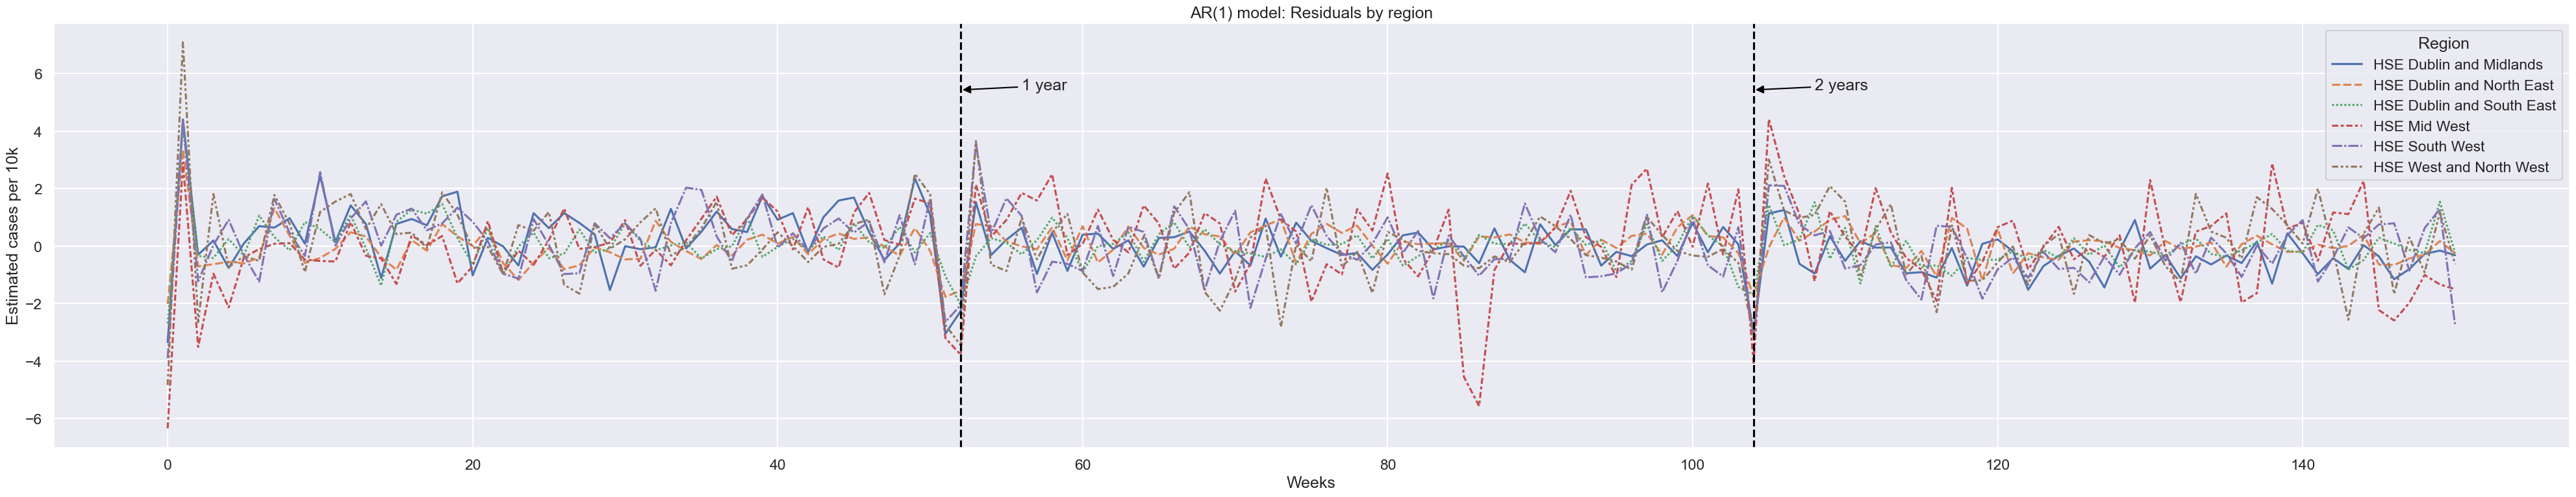

In [151]:
plt.figure(figsize=(40,8))

# annotation text
y_loc=.7; x_shift=4

axs = sns.lineplot(data=df_residuals)
axs.axvline(x=104, color='black', linestyle='--', label='104 Weeks')
axs.axvline(x=52,  color='black', linestyle='--', label='52 Weeks')

axs.annotate('2 years', xy=(104, plt.ylim()[1]*y_loc), xytext=(104+x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
axs.annotate('1 year',  xy=(52,  plt.ylim()[1]*y_loc), xytext=(52 +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))

axs.set_title('AR(1) model: Residuals by region')
axs.set_xlabel('Weeks')
axs.set_ylabel('Estimated cases per 10k')

plt.tight_layout()